# TIMESERIES FORECASTING ON PETROL CONSUMPTION

In [ ]:
#Dataset link : https://www.kaggle.com/saurav9786/time-series-tutorial/data?select=Petrol.csv

In [147]:
#importing Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Time Series Forecasting\\Sample Paper\\Datasets\\Petrol.csv')
df.head()#first five observations

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [150]:
df.tail()#last 5 observations

,Year,Quarter,Consumption
46,2012,Q3,0.88818
47,2012,Q4,0.99804
48,2013,Q1,0.84120
49,2013,Q2,0.74032
50,2013,Q3,0.72823


In [151]:
df.shape #51 records and 3 columns

(51, 3)

In [152]:
df.info()#summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         51 non-null     int64  
 1   Quarter      51 non-null     object 
 2   Consumption  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [153]:
#Year,Consumption are numerical and Quater categorical

In [154]:
#Simple EDA

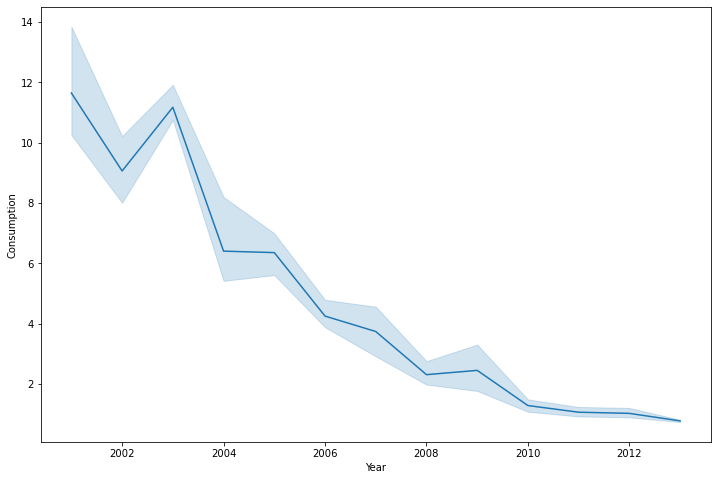

In [155]:
plt.figure(figsize=(12,8))
sns.lineplot(df['Year'],df['Consumption'],palette='set2')
plt.show()

In [156]:
##With years in progress we can see that the consumption of petrol is decreasing

In [157]:
#converting to time series

In [158]:
date=pd.date_range(start='01/01/2001',periods=len(df),freq='Q')#for example: 01/01/2015 (Month/Day/Year)
date

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [159]:
df['Date']=date
df.set_index('Date',inplace=True)
df1=df.drop(['Year','Quarter'],axis=1)
df1.head()

,Consumption
Date,
2001-03-31,14.978
2001-06-30,11.099
2001-09-30,10.057
2001-12-31,10.454
2002-03-31,9.295


In [160]:
#checking for null values

In [161]:
df1.isnull().sum()

Consumption    0
dtype: int64

In [162]:
#There are no null values present

In [163]:
#EDA

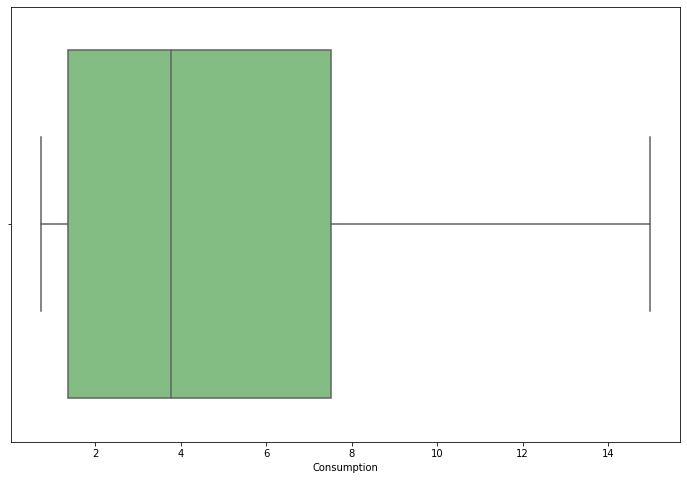

In [164]:
plt.figure(figsize=(12,8))
sns.boxplot(df1['Consumption'],palette='YlGn_r')
plt.show()

In [165]:
#most of the Consumption distribution is in the range is 2 to 8

In [166]:
#Year wise Distribution

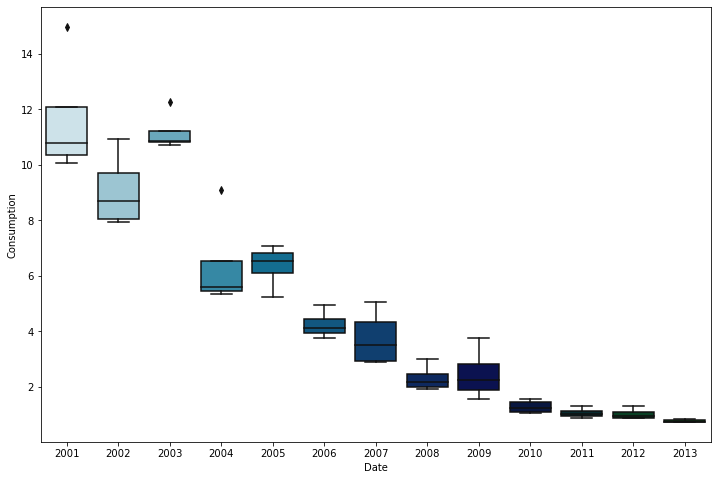

In [167]:
plt.figure(figsize=(12,8))
sns.boxplot(df1.index.year,df1['Consumption'],palette='ocean_r')
plt.show()

In [168]:
##With years in progress we can see that the consumption of petrol is decreasing, in 2002 it was liitle high
#(bigger the size of the box represents High variation of data in that year)

In [169]:
#Quarter wise distribution

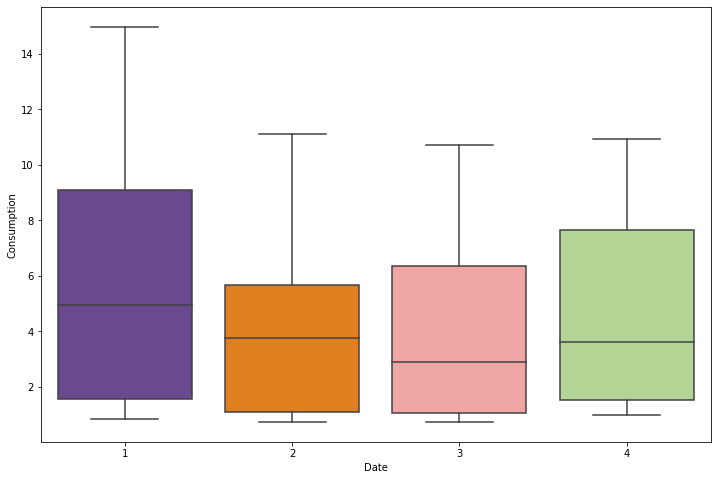

In [170]:
plt.figure(figsize=(12,8))
sns.boxplot(df1.index.quarter,df1['Consumption'],palette='Paired_r')
plt.show()

In [171]:
#High variation in data can be observed in the month Quarter 1

In [172]:
#Decomposing the time series data and checking for components of time series.

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

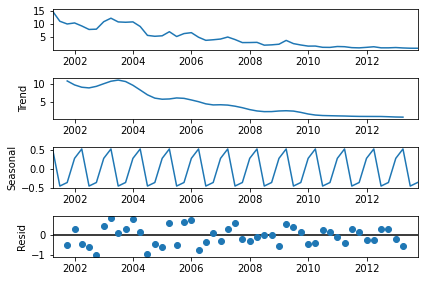

In [174]:
decomposition=seasonal_decompose(df1,model='additive')#additive
decomposition.plot();

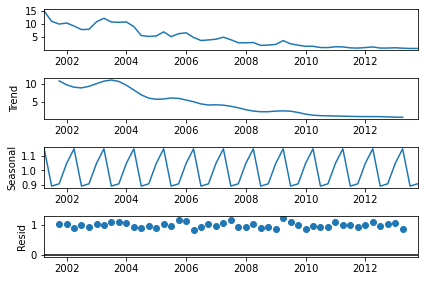

In [175]:
decomposition=seasonal_decompose(df1,model='multiplicative')#multiplicative
decomposition.plot();

In [176]:
#Inferences:

#Additive model: for the additive model we can see trend is additive and seasonality is also additive in nature
#                residuals are spread all over or scattered

#multiplicative model: for the multiplicative model we can see trend is additive and seasonality is also additive in nature
#                residuals lie around the range of 1

#Since seasonality does not change with the trend with both additve and multiplciaitve
#and also residuals lie around the range of 1,multiplicative is the best method

In [177]:
#dicky fuller test to check the stationarity

In [178]:
from statsmodels.tsa.stattools import  adfuller

In [179]:
observations=df1.values
test_result=adfuller(observations)
#test_result

In [180]:
print('ADF stastic : ',test_result[0])#test statistic
print('pvalue  : ',test_result[1])
print('Critical Values:')
for key,value in test_result[4].items():#Critical values for the test statistic at the 1 %, 5 %, and 10 %
    print(key,value)

ADF stastic :  -5.16482533457798
pvalue  :  1.0368472420837897e-05
Critical Values:
1% -3.610399601308181
5% -2.939108945868946
10% -2.6080629651545038


In [181]:
#As pvalue is less than 0.05, the given series is stationary

In [182]:
#cheking for stationary by plotting

Date
1    5.730531
2    4.365773
3    4.230405
4    4.913768
Name: Consumption, dtype: float64


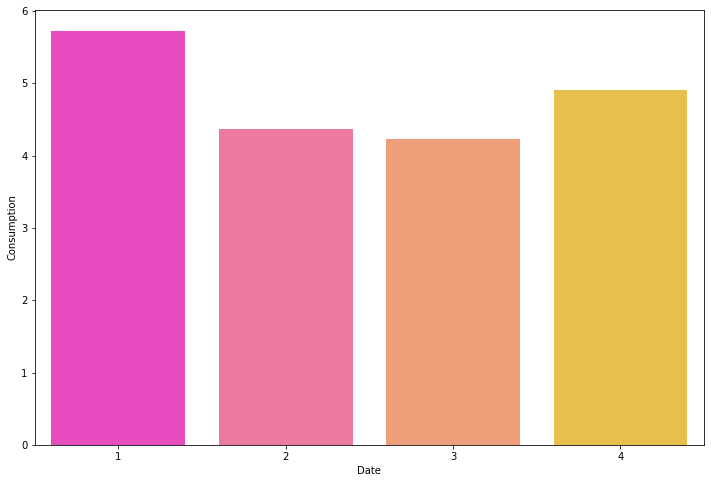

In [183]:
mean_plot=df1.groupby(df1.index.quarter)['Consumption'].agg('mean')
print(mean_plot)
plt.figure(figsize=(12,8))
sns.barplot(mean_plot.index,mean_plot,palette='spring')
plt.show()

In [184]:
#Also Variation in monthly mean plot is indicating that series is stationary

In [185]:
rolling_mean=df1.rolling(window=5).mean()
rolling_std=df1.rolling(window=5).std()

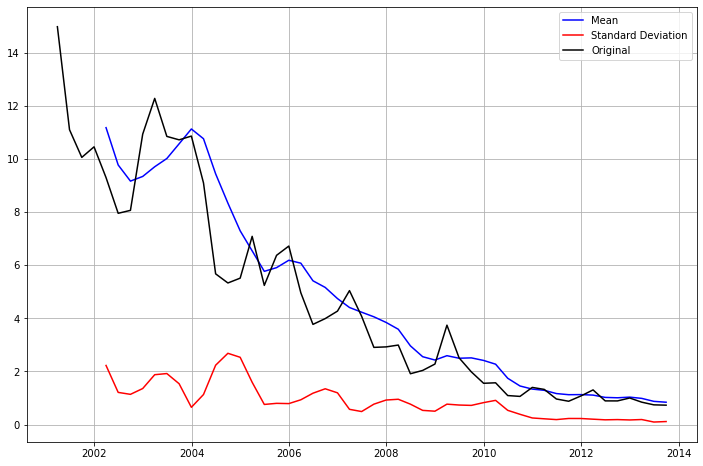

In [186]:
plt.figure(figsize=(12,8))
plt.plot(rolling_mean,'blue',label='Mean')
plt.plot(rolling_std,'red',label='Standard Deviation')
plt.plot(df1,'black',label='Original')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [187]:
#Both rolling mean and std deviation are changing over the period of time

In [188]:
#Check the Auto Correlation funtion and Partial Auto Correlation funtion of the training data.

In [189]:
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.graphics.tsaplots import  plot_acf

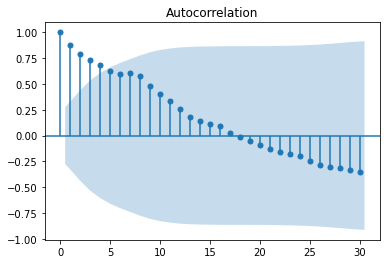

In [190]:
plot_acf(df1,lags=30)
plt.plot;

In [191]:
#Inferences:
#q=0 because its decaying
#ACF plot is showing gradual decay

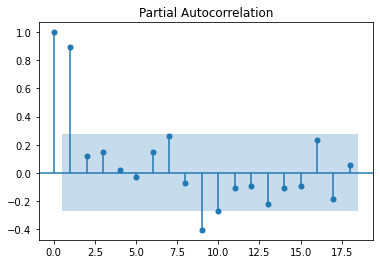

In [192]:
plot_pacf(df1)
plt.plot;

In [193]:
#Inferences:
#whereas PACF plot cut-offs after first two lags.

In [194]:
#Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the model for test data. 

In [195]:
#first Split dataset into train and test sets. Using last 4 quarters of data for testing.

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
Train, Test = train_test_split(df1,test_size=0.06,shuffle=False)#with shuffle=False we can keep it the data in series

In [198]:
Train

,Consumption
Date,
2001-03-31,14.97800
2001-06-30,11.09900
2001-09-30,10.05700
2001-12-31,10.45400
2002-03-31,9.29500
2002-06-30,7.95200
2002-09-30,8.06300
2002-12-31,10.93300
2003-03-31,12.27800


In [199]:
Train.shape

(47, 1)

In [200]:
Test.head()

,Consumption
Date,
2012-12-31,0.99804
2013-03-31,0.84120
2013-06-30,0.74032
2013-09-30,0.72823


In [201]:
Test.shape#last 4 quarters for testing

(4, 1)

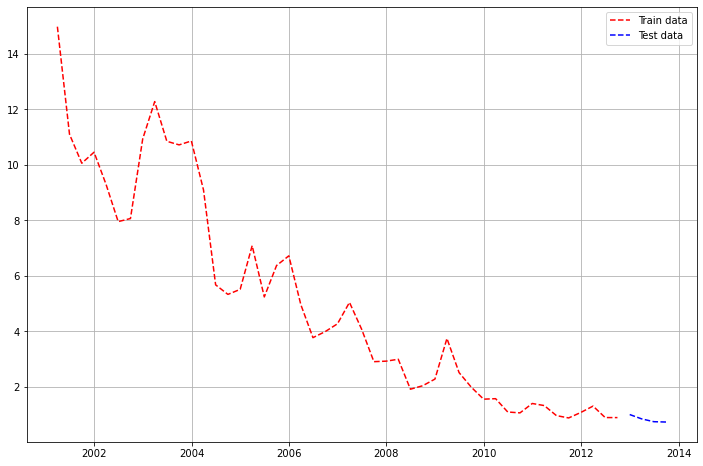

In [202]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'r--',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.legend()
plt.grid(True)
plt.show()

In [203]:
#Exponential Smoothing methods

In [204]:
#1. Simple exponential smoothing model 

In [205]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [206]:
model_SES=SimpleExpSmoothing(Train,initialization_method='estimated')
model_SES_fit=model_SES.fit(optimized=True)

In [207]:
model_SES_pred=model_SES_fit.forecast(steps=len(Test))
model_SES_pred#predicting on the lengeth of the test data

2012-12-31    0.88818
2013-03-31    0.88818
2013-06-30    0.88818
2013-09-30    0.88818
Freq: Q-DEC, dtype: float64

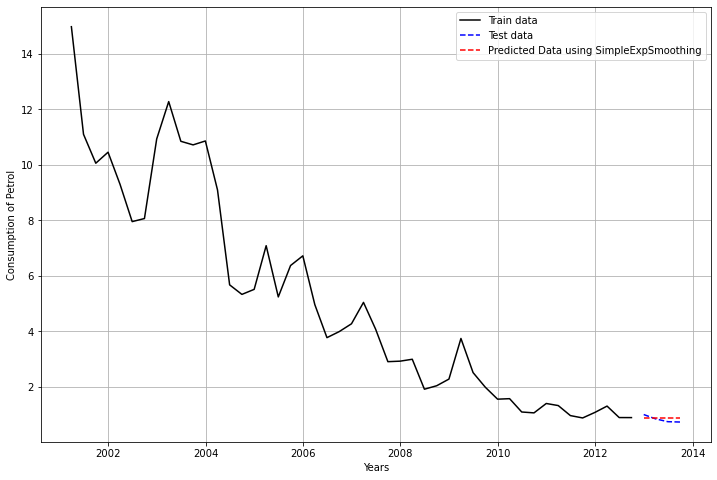

In [208]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(model_SES_pred,'r--',label='Predicted Data using SimpleExpSmoothing')
plt.xlabel('Years')
plt.ylabel('Consumption of Petrol')
plt.legend()
plt.grid(True)
plt.show()

In [209]:
from sklearn.metrics import mean_squared_error

In [210]:
#calculating RMSE
rmse1=mean_squared_error(Test['Consumption'],model_SES_pred,squared=False)
print('The RMSE for the SimpleExpSmoothing model is:',rmse1)

The RMSE for the SimpleExpSmoothing model is: 0.12422049157529572


In [211]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [212]:
#calculating MAPE
mape1=MAPE(Test['Consumption'],model_SES_pred)
print('The MAPE for the SimpleExpSmoothing model is:',mape1)

The MAPE for the SimpleExpSmoothing model is: 14.632278136879407


In [213]:
#MPAE less than or equal to 10% is considered to be execellent
#MPAE less than or equal to 20% is considered to be good

In [214]:
from statsmodels.graphics.gofplots import qqplot

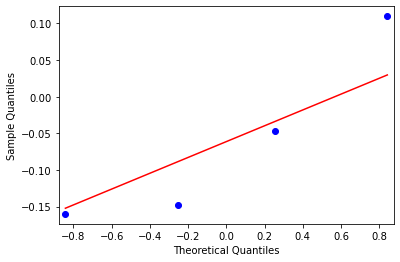

In [215]:
residuals1=Test['Consumption'] - model_SES_pred
qqplot(residuals1,line='s');

In [216]:
#As most of the obseravtion are away form the line we can say the model is not so good
#There is one outlier which can been seen

In [217]:
#2.Double Exponential Smoothing / Holt's linear Method

In [218]:
from  statsmodels.tsa.api import Holt

In [219]:
model_DES=Holt(Train,exponential=True,initialization_method='estimated')
model_DES_fit=model_DES.fit(optimized=True,smoothing_level=0.9,smoothing_trend=0.5)

In [220]:
model_DES_pred=model_DES_fit.forecast(steps=len(Test))
model_DES_pred#predicting on the lengeth of the test data

2012-12-31    0.831728
2013-03-31    0.779249
2013-06-30    0.730081
2013-09-30    0.684016
Freq: Q-DEC, dtype: float64

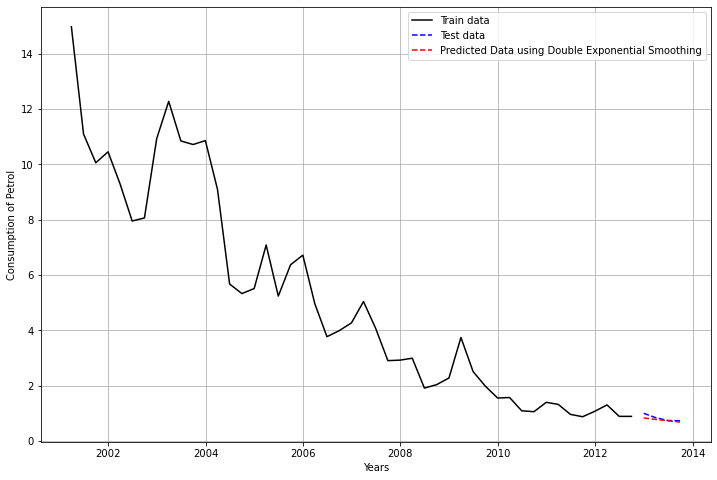

In [221]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(model_DES_pred,'r--',label='Predicted Data using Double Exponential Smoothing')
plt.xlabel('Years')
plt.ylabel('Consumption of Petrol')
plt.legend()
plt.grid(True)
plt.show()

In [222]:
#calculating RMSE
rmse2=mean_squared_error(Test['Consumption'],model_DES_pred,squared=False)
print('The RMSE for the Double Exponential Smoothing model is:',rmse2)

The RMSE for the Double Exponential Smoothing model is: 0.09159329839453638


In [223]:
#calculating MAPE
mape2=MAPE(Test['Consumption'],model_DES_pred)
print('The MAPE for the Double Exponential Smoothing model is:',mape2)

The MAPE for the Double Exponential Smoothing model is: 7.87073567403032


In [224]:
#MPAE less than or equal to 10% is considered to be execellent
#MPAE less than or equal to 20% is considered to be good

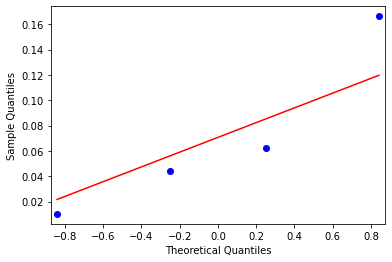

In [225]:
residuals2=Test['Consumption'] - model_DES_pred
qqplot(residuals2,line='s');

In [226]:
#As most of the obseravtion are liitle away form the line we can say the model is little better
#There is one outlier which can been seen

In [227]:
#3.Triple Exponential Smoothing / Holt-Winters Method

In [228]:
from statsmodels.tsa.api import ExponentialSmoothing

In [229]:
model_TES=ExponentialSmoothing(Train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
model_TES_fit=model_TES.fit(optimized=True)

In [230]:
model_TES_pred=model_TES_fit.forecast(steps=len(Test))
model_TES_pred#predicting on the lengeth of the test data

2012-12-31    0.964882
2013-03-31    0.938174
2013-06-30    0.725356
2013-09-30    0.701734
Freq: Q-DEC, dtype: float64

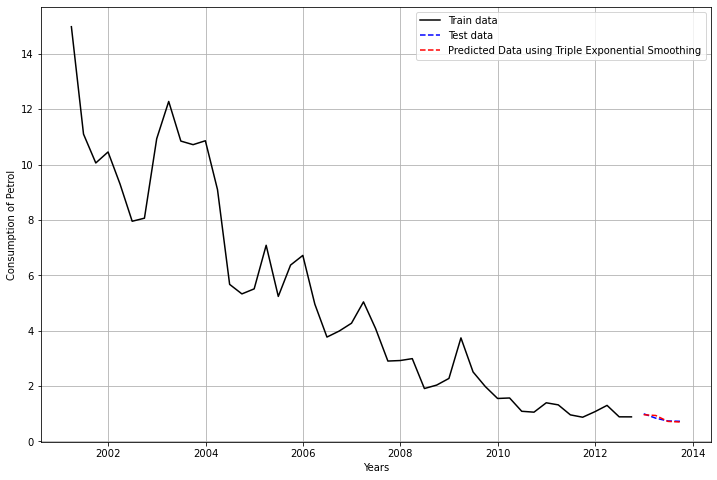

In [231]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(model_TES_pred,'r--',label='Predicted Data using Triple Exponential Smoothing')
plt.xlabel('Years')
plt.ylabel('Consumption of Petrol')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
#calculating RMSE
rmse3=mean_squared_error(Test['Consumption'],model_TES_pred,squared=False)
print('The RMSE for the Double Exponential Smoothing model is:',rmse3)

The RMSE for the Double Exponential Smoothing model is: 0.05345390960564323


In [233]:
#calculating MAPE
mape3=MAPE(Test['Consumption'],model_TES_pred)
print('The MAPE for the Double Exponential Smoothing model is:',mape3)

The MAPE for the Double Exponential Smoothing model is: 5.127516535644015


In [234]:
#MPAE less than or equal to 10% is considered to be execellent
#MPAE less than or equal to 20% is considered to be good

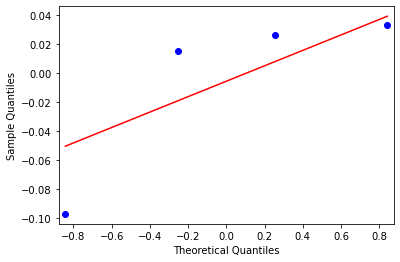

In [235]:
residuals3=Test['Consumption'] - model_TES_pred
qqplot(residuals3,line='s');

In [236]:
#As most of the obseravtion are liitle closer to the line we can say the model is good
#There is one outlier which can been seen

In [237]:
#The Triple Expotential model is better than rest of the models

In [238]:
#ARIMA (AutoRegressive Integrated Moving Average)

In [239]:
import itertools

In [240]:
p=q=range(0,3)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
print('Some parameters combinations are:')
for i in range(1,len(pdq)):
    print(pdq[i])

Some parameters combinations are:
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)


In [241]:
ARIMA_df=pd.DataFrame(columns=['param', 'AIC'])
ARIMA_df

,param,AIC


In [242]:
from statsmodels.tsa.arima_model import ARIMA

In [243]:
for param in pdq:
    try:
        model_ARIMA=ARIMA(Train,order=param)
        ARIMA_result=model_ARIMA.fit()
        print('ARIMA',param,'AIC',ARIMA_result.aic)
        ARIMA_df=ARIMA_df.append({'param':param,'AIC':ARIMA_result.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 0, 0) AIC 262.98328981396685
ARIMA (0, 0, 1) AIC 221.0122418531638
ARIMA (0, 0, 2) AIC 189.9903596237904
ARIMA (0, 1, 0) AIC 149.13853368889477
ARIMA (0, 1, 1) AIC 149.30224050235768
ARIMA (0, 1, 2) AIC 149.28871783275636
ARIMA (1, 0, 0) AIC 160.28009155209838
ARIMA (1, 0, 1) AIC 159.35102932426088
ARIMA (1, 0, 2) AIC 160.85114180831727
ARIMA (1, 1, 0) AIC 150.35002833235956
ARIMA (1, 1, 1) AIC 150.862274051256
ARIMA (1, 1, 2) AIC 147.2266950330953
ARIMA (2, 0, 0) AIC 160.66988838142814
ARIMA (2, 0, 1) AIC 161.18270093616704
ARIMA (2, 0, 2) AIC 166.1733185554811
ARIMA (2, 1, 0) AIC 147.52414059338543
ARIMA (2, 1, 1) AIC 149.52222206445668
ARIMA (2, 1, 2) AIC 149.00795251261403


In [245]:
ARIMA_df.sort_values('AIC', ascending=True)

,param,AIC
11,"(1, 1, 2)",147.226695
15,"(2, 1, 0)",147.524141
17,"(2, 1, 2)",149.007953
3,"(0, 1, 0)",149.138534
5,"(0, 1, 2)",149.288718
4,"(0, 1, 1)",149.302241
16,"(2, 1, 1)",149.522222
9,"(1, 1, 0)",150.350028
10,"(1, 1, 1)",150.862274
7,"(1, 0, 1)",159.351029


In [246]:
#Lowest AIC paramenters (2, 1, 0)

In [247]:
model_ARIMA=ARIMA(Train,order= (2, 1, 0))
ARIMA_model_fit=model_ARIMA.fit()

In [248]:
print(ARIMA_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Consumption   No. Observations:                   46
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -69.762
Method:                       css-mle   S.D. of innovations              1.099
Date:                Fri, 24 Sep 2021   AIC                            147.524
Time:                        23:09:26   BIC                            154.839
Sample:                    06-30-2001   HQIC                           150.264
                         - 09-30-2012                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2904      0.141     -2.065      0.039      -0.566      -0.015
ar.L1.D.Consumption     0.1773      0.155      1.144      0.252      -0.126       0.481
ar.L2.D.Consumpt

In [249]:
ARIMA_model_pred=ARIMA_model_fit.forecast(steps=len(Test))[0]
ARIMA_model_pred

array([ 0.69155541,  0.31800207, -0.01947163, -0.28948333])

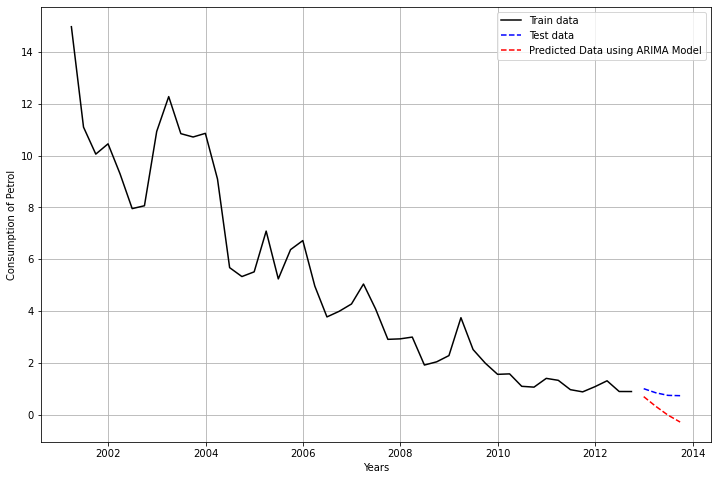

In [250]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(Test.index,ARIMA_model_pred,'r--',label='Predicted Data using ARIMA Model')
plt.xlabel('Years')
plt.ylabel('Consumption of Petrol')
plt.legend()
plt.grid(True)
plt.show()

In [251]:
#calculating RMSE
rmse4=mean_squared_error(Test['Consumption'],ARIMA_model_pred,squared=False)
print('The RMSE for the ARIMA model is:',rmse4)

The RMSE for the ARIMA model is: 0.7036854117974203


In [252]:
#calculating MAPE
mape4=MAPE(Test['Consumption'],ARIMA_model_pred)
print('The MAPE for the ARIMA model is:',mape4)

The MAPE for the ARIMA model is: 83.82176586769833


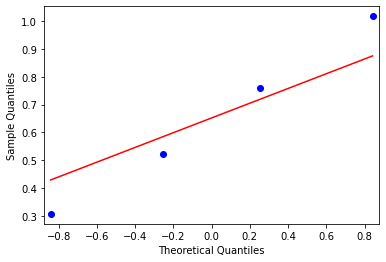

In [253]:
residuals_ARIMA = Test['Consumption'] - ARIMA_model_pred
qqplot(residuals_ARIMA,line='s')
plt.show()

<Figure size 864x576 with 0 Axes>

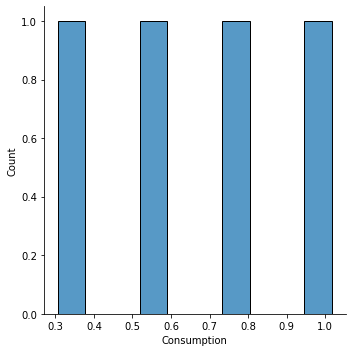

In [257]:
plt.figure(figsize=(12,8))
sns.displot(residuals_ARIMA,bins=10)
plt.show()

In [258]:
#Inference:

#when the obseravtions are on the line, the model is underfitted
#when the obseravtions are on farway from the line, the model is overfitted

#As most of the obseravtion are little away from to the line we can say the model is better

In [261]:
#ARIMA_model_fit.plot_diagnostics(figsize=(16, 8))
#plt.show()

In [262]:
#SARIMA (seasonal autoregressive integrated moving average)

In [263]:
#Now to include seasonality, we will use SARIMA model

In [264]:
#we will find the model parameters based on AIC criteria. 
#Parameters will be generated using combination for the given range.

In [265]:
p=q=range(0,2)
d=range(0,3)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (0, 2, 0),
 (0, 2, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (1, 2, 0),
 (1, 2, 1)]

In [266]:
model_pdq=[(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]
model_pdq

[(0, 0, 0, 4),
 (0, 0, 1, 4),
 (0, 1, 0, 4),
 (0, 1, 1, 4),
 (0, 2, 0, 4),
 (0, 2, 1, 4),
 (1, 0, 0, 4),
 (1, 0, 1, 4),
 (1, 1, 0, 4),
 (1, 1, 1, 4),
 (1, 2, 0, 4),
 (1, 2, 1, 4)]

In [267]:
SARIMA_df=pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_df

,param,seasonal,AIC


In [268]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [269]:
for param in pdq:
    for param_seasonal in model_pdq:
        model_SARIMA=sm.tsa.statespace.SARIMAX(Train,
                                               seasonal_order=param_seasonal,
                                               order=param,
                                               enforce_stationarity=False,
                                               enforce_invertibility=False)
        results_SARIMA=model_SARIMA.fit()
        print('SARIMA',param,param_seasonal,'4',' - ','AIC',results_SARIMA.aic)
        SARIMA_df=SARIMA_df.append({'param':param,'seasonal':param_seasonal,'AIC':results_SARIMA.aic},ignore_index=True)

SARIMA (0, 0, 0) (0, 0, 0, 4) 4  -  AIC 298.6184363764856
SARIMA (0, 0, 0) (0, 0, 1, 4) 4  -  AIC 235.55513263202397
SARIMA (0, 0, 0) (0, 1, 0, 4) 4  -  AIC 182.4367608545758
SARIMA (0, 0, 0) (0, 1, 1, 4) 4  -  AIC 163.6973288437537
SARIMA (0, 0, 0) (0, 2, 0, 4) 4  -  AIC 203.4547289796715
SARIMA (0, 0, 0) (0, 2, 1, 4) 4  -  AIC 143.79321540851754
SARIMA (0, 0, 0) (1, 0, 0, 4) 4  -  AIC 175.66589676248353
SARIMA (0, 0, 0) (1, 0, 1, 4) 4  -  AIC 147.8833870178651
SARIMA (0, 0, 0) (1, 1, 0, 4) 4  -  AIC 165.24408537414166
SARIMA (0, 0, 0) (1, 1, 1, 4) 4  -  AIC 148.9548251666824
SARIMA (0, 0, 0) (1, 2, 0, 4) 4  -  AIC 146.54737582868944
SARIMA (0, 0, 0) (1, 2, 1, 4) 4  -  AIC 136.1972111445552
SARIMA (0, 0, 1) (0, 0, 0, 4) 4  -  AIC 242.4795778968355
SARIMA (0, 0, 1) (0, 0, 1, 4) 4  -  AIC 189.55028808827535
SARIMA (0, 0, 1) (0, 1, 0, 4) 4  -  AIC 141.3272014057693
SARIMA (0, 0, 1) (0, 1, 1, 4) 4  -  AIC 126.86590480534711
SARIMA (0, 0, 1) (0, 2, 0, 4) 4  -  AIC 164.1825717619804
SARIMA 

In [270]:
SARIMA_df.sort_values('AIC')

,param,seasonal,AIC
95,"(1, 0, 1)","(1, 2, 1, 4)",93.189367
47,"(0, 1, 1)","(1, 2, 1, 4)",93.607313
35,"(0, 1, 0)","(1, 2, 1, 4)",94.507908
119,"(1, 1, 1)","(1, 2, 1, 4)",95.408809
107,"(1, 1, 0)","(1, 2, 1, 4)",96.481115
...,...,...,...
13,"(0, 0, 1)","(0, 0, 1, 4)",189.550288
4,"(0, 0, 0)","(0, 2, 0, 4)",203.454729
1,"(0, 0, 0)","(0, 0, 1, 4)",235.555133
12,"(0, 0, 1)","(0, 0, 0, 4)",242.479578


In [271]:
#Parameters used are (1, 2, 1, 4) for seasonal_order and (0,1,1) for order

In [272]:
model_SARIMA=sm.tsa.statespace.SARIMAX(Train,seasonal_order=(1, 2, 1, 4),order=(0,1,1),enforce_stationarity=False,enforce_invertibility=False)
model_SARIMA_fit=model_SARIMA.fit()

In [273]:
print(model_SARIMA_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       Consumption   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(1, 2, 1, 4)   Log Likelihood                 -42.804
Date:                           Fri, 24 Sep 2021   AIC                             93.607
Time:                                   23:10:24   BIC                             99.470
Sample:                               03-31-2001   HQIC                            95.551
                                    - 09-30-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0344      0.235     -0.146      0.884      -0.495       0.426
ar.S.L4       -0.7272      0.076     -9.556

In [274]:
SARIMA_model_pred=model_SARIMA_fit.forecast(steps=len(Test))
SARIMA_model_pred

2012-12-31    0.888286
2013-03-31    0.853765
2013-06-30    0.827036
2013-09-30    0.823418
Freq: Q-DEC, Name: predicted_mean, dtype: float64

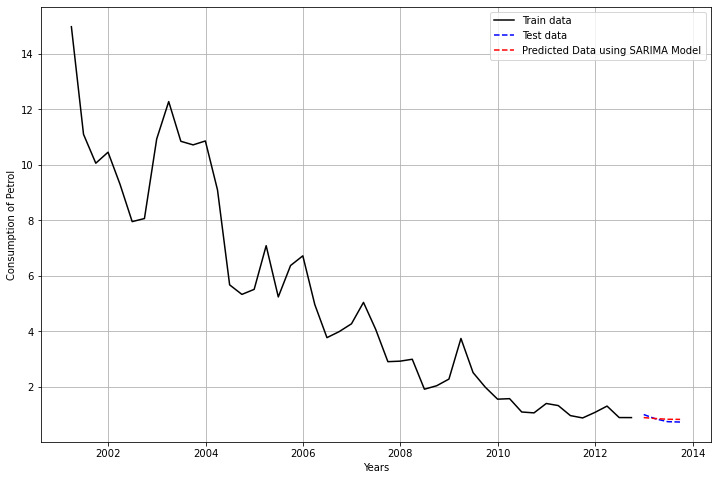

In [275]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(Train,'black',label='Train data')
plt.plot(Test,'b--',label='Test data')
plt.plot(Test.index,SARIMA_model_pred,'r--',label='Predicted Data using SARIMA Model')
plt.xlabel('Years')
plt.ylabel('Consumption of Petrol')
plt.legend()
plt.grid(True)
plt.show()

In [276]:
#calculating RMSE
rmse5=mean_squared_error(Test['Consumption'],SARIMA_model_pred,squared=False)
print('The RMSE for the SARIMA model is:',rmse5)

The RMSE for the SARIMA model is: 0.08482959140150673


In [277]:
#calculating MAPE
mape5=MAPE(Test['Consumption'],SARIMA_model_pred)
print('The MAPE for the SARIMA model is:',mape5)

The MAPE for the SARIMA model is: 9.318779792930068


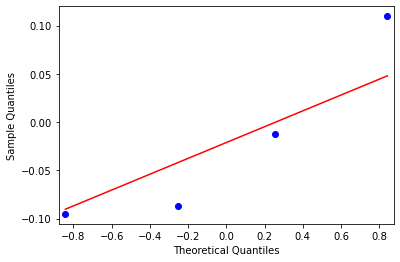

In [278]:
residuals_SARIMA=Test['Consumption'] - SARIMA_model_pred
qqplot(residuals_SARIMA,line='s')
plt.show()

<Figure size 864x576 with 0 Axes>

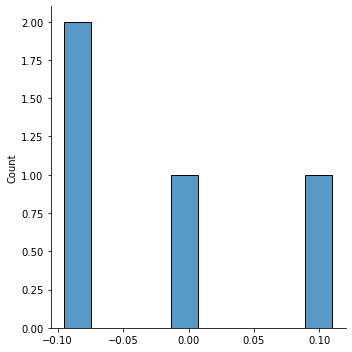

In [279]:
plt.figure(figsize=(12,8))
sns.displot(residuals_SARIMA,bins=10)
plt.show()

In [280]:
#model residual analysis for SARIMA model (can be done for all models)

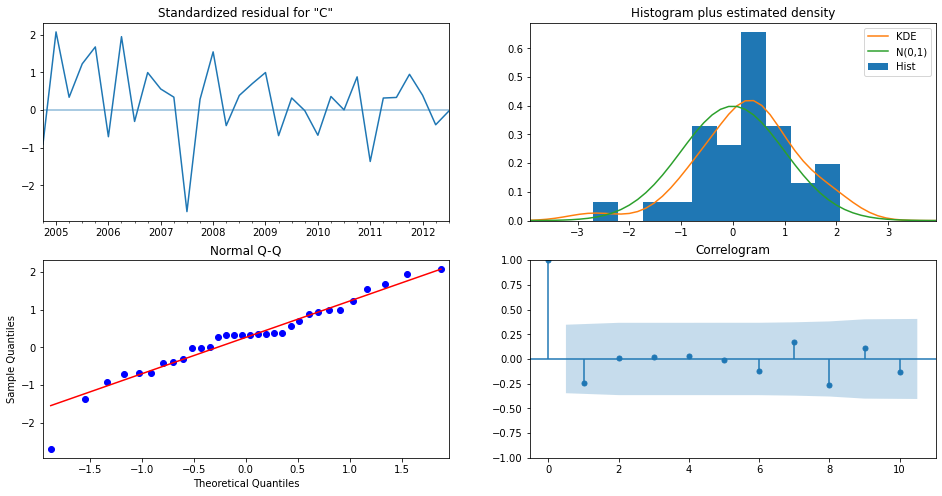

In [281]:
model_SARIMA_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [282]:
#Inference:

#when the obseravtions are on the line, the model is underfitted
#when the obseravtions are on farway from the line, the model is overfitted

#As most of the obseravtion are close to the line we can say the model is good
#There is one outlier which can been seen

In [283]:
#We will be using full data(train and test) to predict an unseen data for 4 Quarters using SARIMA model

In [284]:
data=df1#taking the whole dataset

In [285]:
data.shape#shape

(51, 1)

In [286]:
model_SARIMA1=sm.tsa.statespace.SARIMAX(data,seasonal_order=(1, 2, 1, 4),order=(0,1,1),enforce_stationarity=False,enforce_invertibility=False)
model_SARIMA_fit1=model_SARIMA1.fit()

In [287]:
SARIMA_model_pred1=model_SARIMA_fit1.forecast(steps=4)
SARIMA_model_pred1

2013-12-31    0.613523
2014-03-31    0.681915
2014-06-30    0.695751
2014-09-30    0.749207
Freq: Q-DEC, Name: predicted_mean, dtype: float64

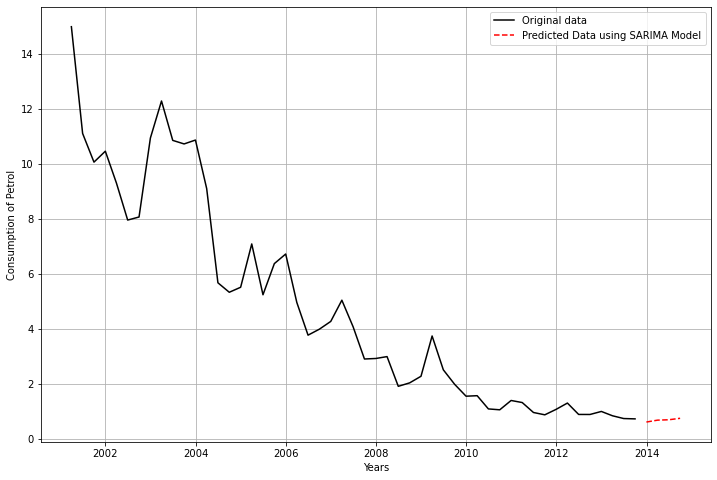

In [288]:
#plotting train and test data
plt.figure(figsize=(12,8))
plt.plot(data,'black',label='Original data')
plt.plot(SARIMA_model_pred1.index,SARIMA_model_pred1,'r--',label='Predicted Data using SARIMA Model')
plt.xlabel('Years')
plt.ylabel('Consumption of Petrol')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
#----------------------------------END----------------------------------------------------------------#